### Load important libraries and set presets for visualization

---


In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Set display and visualization settings
pd.set_option("display.float_format", lambda x: "%.3f" % x)
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = [10, 5]

### Load Data and Show Summary Statistics

---


In [144]:
# %%

# Load the data
df = pd.read_csv("Burnout.csv")
df.head()

,Timestamp,Do you grant your consent to participate in this survey?,Gender,Age,Kindly select your university of study,Level,Religion,Location,Ethnicity,Study's financing,...,I have become less interested in my studies since my enrollment at the school.,I have become less enthusiastic about my studies.,I have become more cynical about the potential usefulness of my studies.,I doubt the significance of my studies.,I can effectively solve the problems that arise in my studies.,I believe that I make an effective contribution to the classes that I attend.,"In my opinion, I am a good student.",I have learned many interesting things during the course of my studies.,I feel stimulated when I achieve my study goals.,During class I feel confident that I am effective in getting things done.
0,2024/07/16 12:19:19 PM PDT,Yes,Female,21 - 23,UG,400,Cristian,Off Campus,Ga,Family,...,6,6,6,0,6,6,6,6,6,6
1,2024/07/16 12:23:35 PM PDT,Yes,Male,21 - 23,COHk,300,Cristian,Off Campus,Others,Family,...,3,3,3,3,3,3,3,3,3,3
2,2024/07/16 12:26:52 PM PDT,Yes,Male,24 - 27,COHk,300,Cristian,Off Campus,Others,Family,...,0,6,0,0,3,2,6,6,6,6
3,2024/07/16 12:37:54 PM PDT,Yes,Male,21 - 23,COHk,300,Muslim,Off Campus,Others,Family,...,6,6,6,6,3,3,0,6,6,6
4,2024/07/16 12:38:43 PM PDT,Yes,Male,21 - 23,COHk,300,Cristian,Off Campus,Akan,Family,...,3,1,2,3,3,2,6,6,5,6


In [145]:
# Explore distribution by university
df["Kindly select your university of study"].value_counts()

Kindly select your university of study
COHk    100
UG       79
UCC      71
UHAS     65
UDS      60
Name: count, dtype: int64

In [146]:
# remane "Kindly select your university of study" to "University" for consistency

df["Kindly select your university of study"].value_counts()

# rename "Kindly select your university of study" to "University" to "University"
df.rename(
    columns={"Kindly select your university of study": "University"}, inplace=True
)

In [147]:
# Convert Level to categorical
df["Level"] = df["Level"].astype("object")

In [148]:
# Display information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 27 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Timestamp                                                                       375 non-null    object
 1   Do you grant your consent to participate in this survey?                        375 non-null    object
 2   Gender                                                                          375 non-null    object
 3   Age                                                                             375 non-null    object
 4   University                                                                      375 non-null    object
 5   Level                                                                           375 non-null    object
 6   Religion                  

In [149]:
# %%

# Descriptive statistics
df.describe()

,I feel emotionally drained by my studies.,I feel used up at the end of a day at school.,I feel like my courses are breaking me down.,I feel frustrated by my course activities.,I feel studying or attending a class is really a strain on me.,I have become less interested in my studies since my enrollment at the school.,I have become less enthusiastic about my studies.,I have become more cynical about the potential usefulness of my studies.,I doubt the significance of my studies.,I can effectively solve the problems that arise in my studies.,I believe that I make an effective contribution to the classes that I attend.,"In my opinion, I am a good student.",I have learned many interesting things during the course of my studies.,I feel stimulated when I achieve my study goals.,During class I feel confident that I am effective in getting things done.
count,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000
mean,4.973,4.845,4.923,4.859,5.024,2.595,2.560,2.443,2.339,4.371,4.293,4.360,4.357,4.424,4.459
std,1.504,1.413,1.445,1.458,1.458,1.977,1.846,1.913,2.088,1.739,1.523,1.504,1.579,1.568,1.633
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.000,4.000,4.000,4.000,4.000,1.000,1.000,1.000,0.000,3.000,3.000,3.000,3.000,3.000,3.000
50%,6.000,5.000,6.000,5.000,6.000,3.000,2.000,2.000,2.000,5.000,5.000,5.000,5.000,5.000,5.000
75%,6.000,6.000,6.000,6.000,6.000,3.000,4.000,3.000,3.000,6.000,5.000,6.000,6.000,6.000,6.000
max,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000


In [150]:
# Check for missing values in dataframe with column and number of missing values


def check_missing_values(df):
    if df.isnull().sum().sum() == 0:
        print("No missing values")
    else:
        # show number of missing values as a dataframe by column
        missing_values = df.isnull().sum()
        missing_values = missing_values[missing_values > 0]
        missing_values = missing_values.sort_values(ascending=False)
        missing_values = missing_values.reset_index()
        missing_values.columns = ["Feature", "Missing Values"]
        missing_values


check_missing_values(df)

No missing values


### Distributions of Numerical and Categorical Features

---


In [151]:
numerical_vars = df.select_dtypes(include=["float64", "int64"]).columns
categorical_vars = df.select_dtypes(include=["object"]).columns

print(f"Numerber of numerical variables: {len(numerical_vars)}")
print(f"Numerber of categorical variables: {len(categorical_vars)}")

Numerber of numerical variables: 15
Numerber of categorical variables: 12


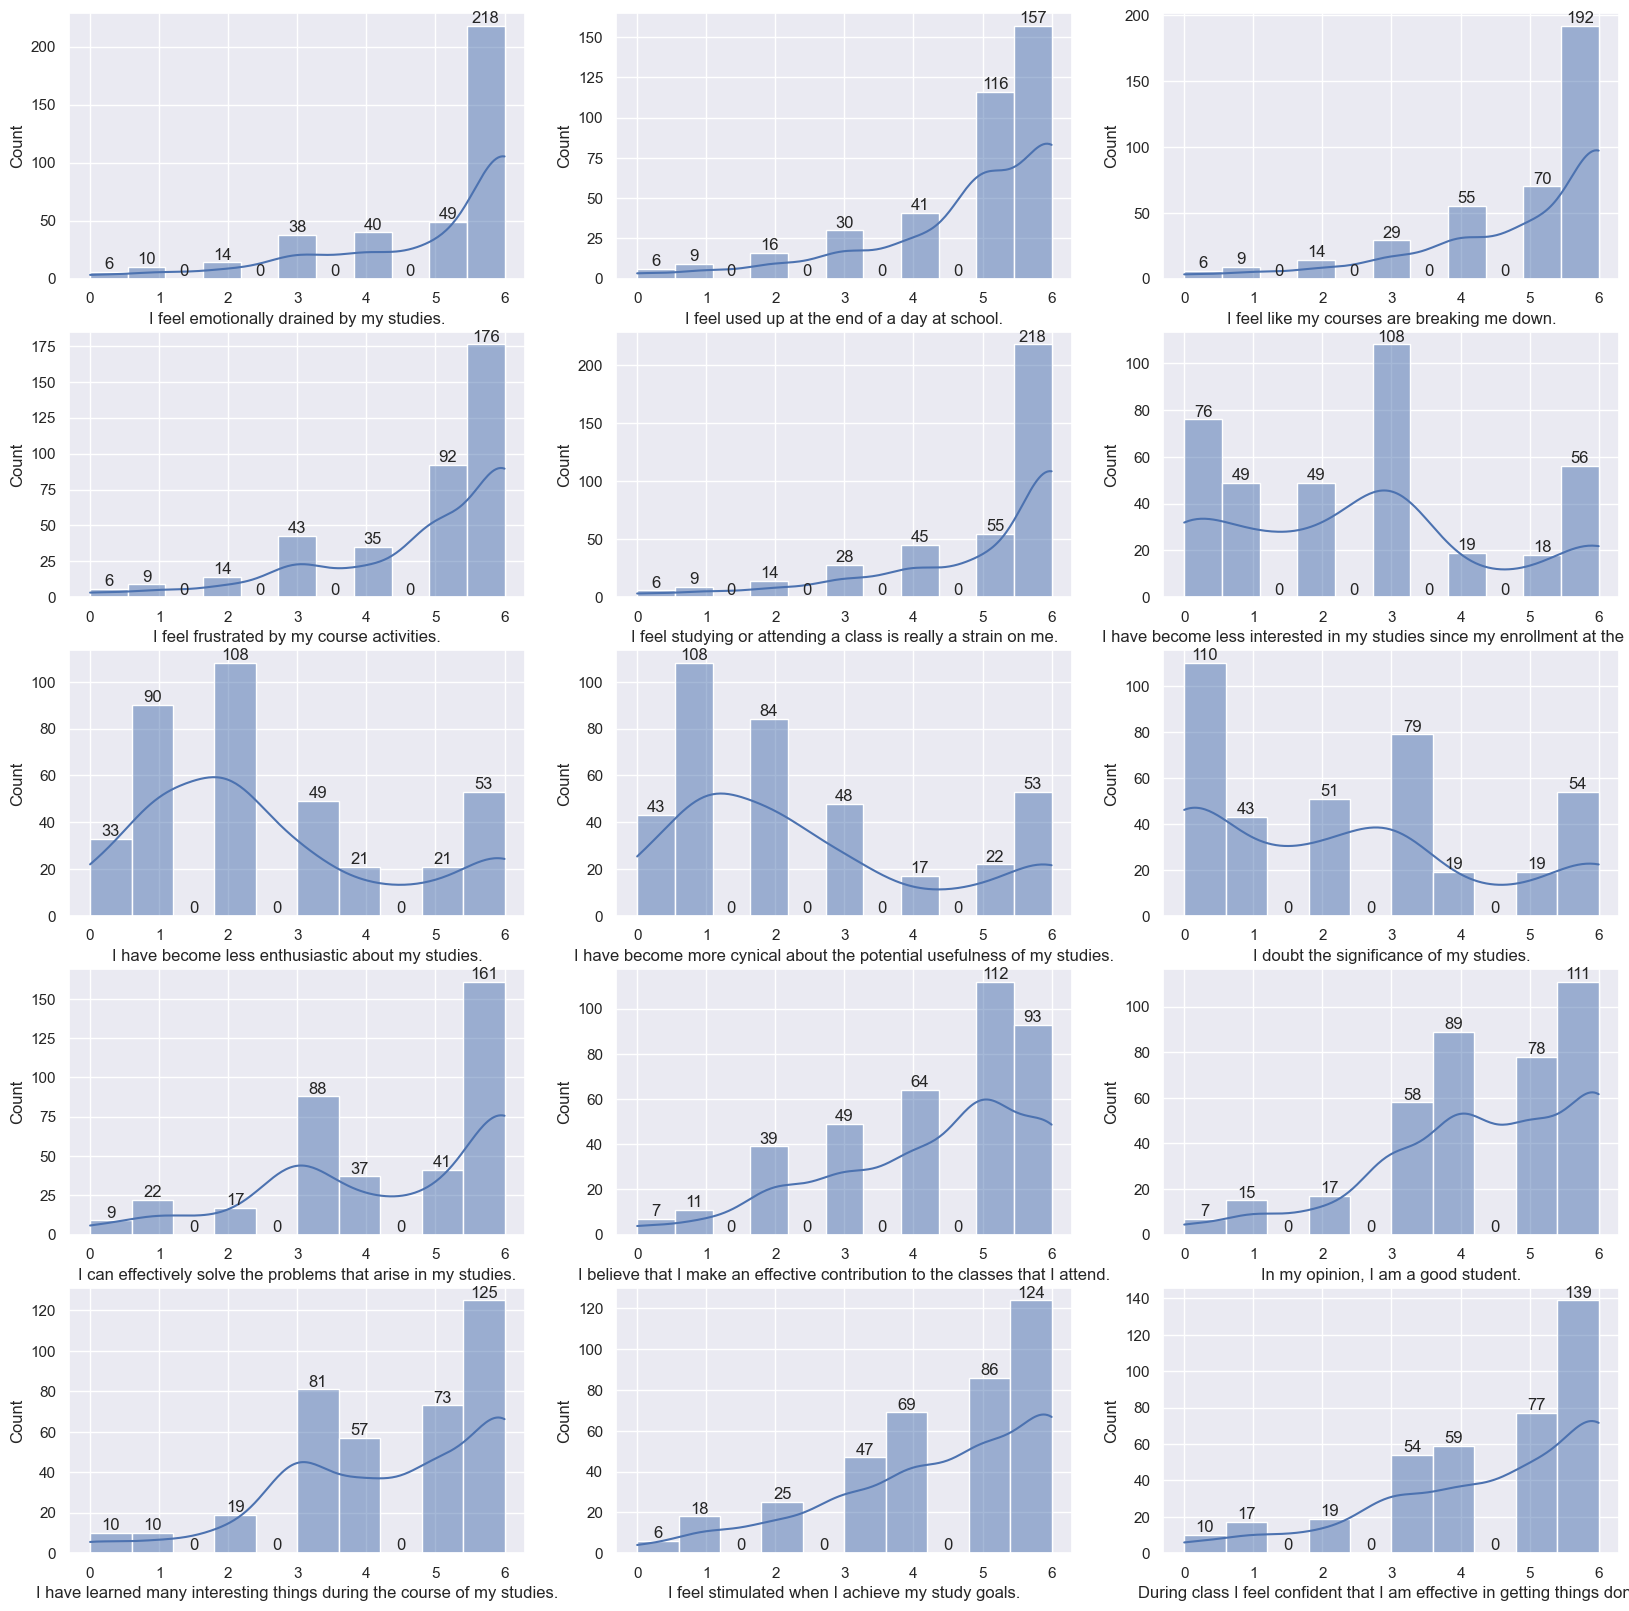

In [152]:
fig, axes = plt.subplots(5, 3, figsize=(20, 20))

for i, ax in enumerate(axes.flatten()):
    if i < len(numerical_vars):
        sns.histplot(df[numerical_vars[i]], ax=ax, kde=True)
        ax.bar_label(ax.containers[0], fmt="%.0f", label_type="edge")
        # ax.set_title(f"Histogram of {numerical_vars[i]}")

Image 3 provides a detailed breakdown of responses to individual questions related to burnout among students:

1. **Emotional Exhaustion (EE)**:

- "`I feel emotionally drained by my studies`": **Heavily skewed towards 6 (218 responses)**.
- "`I feel used up at the end of a day at school`": **Strong bias towards 6 (157 responses) and 5 (116 responses)**.
- "`I feel like my courses are breaking me down`": **Majority at 6 (192 responses)**.
- "`I feel frustrated by my course activities"`:**Highest at 6 (176 responses)**.
- "`I feel studying or attending a class is really a strain on me`": **Peaked at 6 (218 responses)**.

2. **Cynicism (CY)**:

- "`I have become less interested in my studies since my enrollment`": **Bimodal distribution with peaks at 0 (76 responses) and 3 (108 responses)**.
- "`I have become less enthusiastic about my studies`": **Highest at 2 (108 responses)**.
- "`I have become more cynical about the potential usefulness of my studies`": **Peaks at 1 (84 responses) and 0 (108 responses)**.
- "`I doubt the significance of my studies`": **Highest at 3 (79 responses) and 6 (54 responses)**.

3. **Academic Efficacy (AE)**:

- "`I can effectively solve the problems that arise in my studies`": **Peaked at 6 (161 responses)**.
- "`I believe that I make an effective contribution to the classes that I attend`": **Highest at 5 (112 responses) and 6 (93 responses)**.
- "`In my opinion, I am a good student`": **Strong bias towards 6 (111 responses)**.
- "`I have learned many interesting things during the course of my studies`": **Peaked at 6 (125 responses)**.
- "`I feel stimulated when I achieve my study goals`": **Highest at 6 (124 responses)**.
- "`During class I feel confident that I am effective in getting things done`": **Peaked at 6 (139 responses)**.

Overall, this detailed view shows high levels of emotional exhaustion, mixed levels of cynicism, and generally high academic efficacy among the students surveyed.


### Distribution of Categorical Variables

---


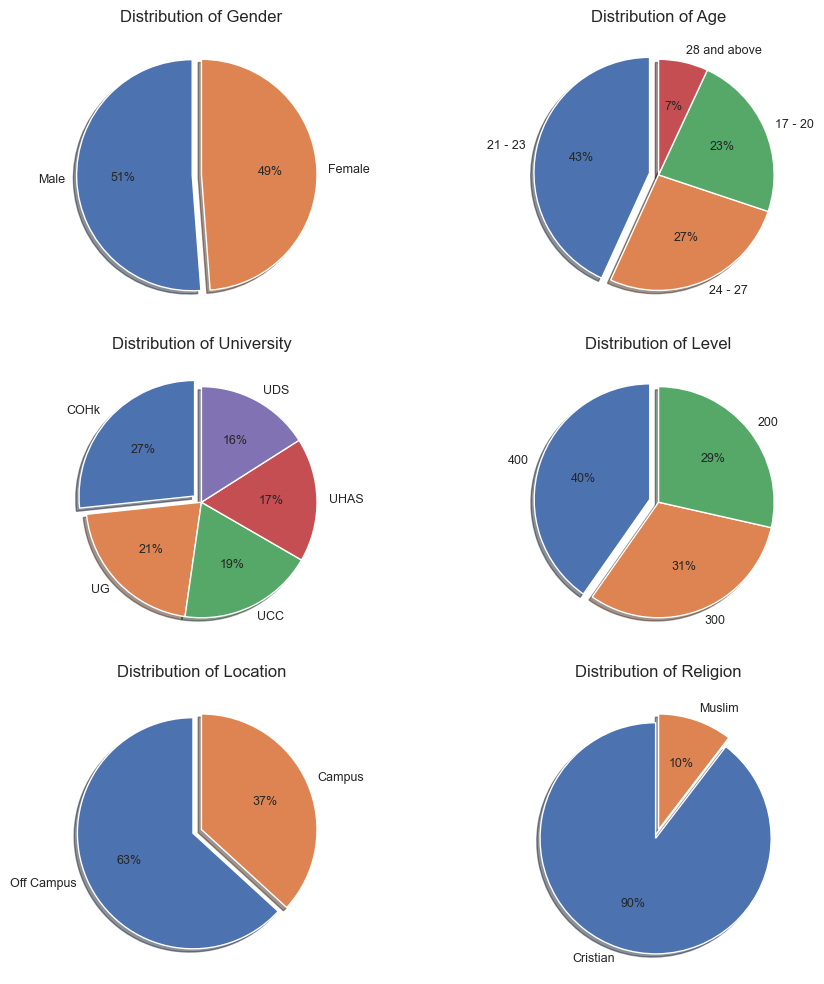

In [153]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# GAULR
categorical_vars = ["Gender", "Age", "University", "Level", "Location", "Religion"]
cc = ["magma", "viridis", "cividis", "magma"]

for i, ax in enumerate(axes.flatten()):
    # Count the occurrences of each category
    count_data = df[categorical_vars[i]].value_counts().sort_values(ascending=False)
    # Create pie chart
    n = count_data.shape[0]
    wedges, texts, autotexts = ax.pie(
        count_data,
        labels=count_data.index,
        autopct="%.0f%%",
        # colors=sns.color_palette(n_colors=n, palette=cc[i]),
        startangle=90,
        textprops={"fontsize": 9},
        explode=[0.08] + [0] * (n - 1),
        shadow=True,
    )
    ax.set(title=f"Distribution of {categorical_vars[i]}")

plt.tight_layout()
plt.show()

### Interpretation of Distribution

This Image presents demographic information of the survey respondents:

1. **`Gender`**: Almost evenly split, with **51% male** and **49% female**.

2. **`Age`**: Predominantly **young adults, with 43% aged 21-23**, **27% aged 24-27, 23% aged 17-20, and only 7% 28 and above**.

3. **`University`**: Fairly distributed across institutions - **COHk (27%), UG (21%), UCC (19%), UHAS (17%), and UDS (16%)**.

4. **`Level`**: Mostly upper-level students, with **40% in `level 400`**, **31% in `level 300`**, and **29% in `level 200`**.

5. **`Location`**: Majority **(63%) live `off-campus`**, while **37% live `on campus`**.

6. **`Religion`**: Overwhelmingly **`Christian` (90%)**, with **10% `Muslim`**.

This depicts a diverse sample of young adult students, primarily Christian, with a slight majority living off-campus and studying at higher academic levels.


### Calculate Burnout Scores

---


In [1]:
# %%

# Define burnout score categories

# Emotional Exhaustion (EE) Score
ee_columns = [
    "I feel emotionally drained by my studies.",
    "I feel used up at the end of a day at school.",
    "I feel like my courses are breaking me down.",
    "I feel frustrated by my course activities.",
    "I feel studying or attending a class is really a strain on me.",
]

# Cynicism (CY) Score
cy_columns = [
    "I have become less interested in my studies since my enrollment at the school.",
    "I have become less enthusiastic about my studies.",
    "I have become more cynical about the potential usefulness of my studies.",
    "I doubt the significance of my studies.",
]

# Academic Efficacy (AE) Score
ae_columns = [
    "I can effectively solve the problems that arise in my studies.",
    "I believe that I make an effective contribution to the classes that I attend.",
    "In my opinion, I am a good student.",
    "I have learned many interesting things during the course of my studies.",
    "I feel stimulated when I achieve my study goals.",
    "During class I feel confident that I am effective in getting things done.",
]

# Calculate burnout scores
df["EE_Score"] = df[ee_columns].mean(axis=1)
df["CY_Score"] = df[cy_columns].mean(axis=1)
df["AE_Score"] = df[ae_columns].mean(axis=1)

# Reverse AE_Score (as it measures reduced personal accomplishment)
df["AE_Score"] = 6 - df["AE_Score"]

# Calculate the overall burnout score
df["Burnout_Score"] = 0.4 * df["EE_Score"] + 0.3 * df["CY_Score"] + 0.3 * df["AE_Score"]

# Display summary statistics for burnout scores
# print(df[["EE_Score", "CY_Score", "AE_Score", "Burnout_Score"]].describe())

NameError: name 'df' is not defined

### Explanation of Methodology

---

This code snippet is calculating the burnout scores for three different dimensions of burnout based on survey responses: **Emotional Exhaustion (EE)**, **Cynicism (CY)**, and **Academic Efficacy (AE)**. Each dimension is assessed using a set of questions, and the scores are calculated as the mean of the responses to those questions.

Here's a breakdown of the logic behind each step:

### **1. Define Burnout Score Categories:**

Burnout is a multidimensional construct that is often measured using different subscales or dimensions. In this case, the burnout score is broken down into three categories:

- **Emotional Exhaustion (EE)**: This dimension measures feelings of being emotionally overextended and exhausted by one's studies.

  - The columns in `ee_columns` represent the survey questions that assess emotional exhaustion.

- **Cynicism (CY)**: This dimension captures a negative or detached attitude towards one's studies.

  - The columns in `cy_columns` represent the survey questions that assess cynicism.

- **Academic Efficacy (AE)**: This dimension reflects a student's belief in their ability to perform well academically.
  - The columns in `ae_columns` represent the survey questions that assess academic efficacy.

### **2. Calculate Burnout Scores:**

For each dimension, the code calculates a score by taking the mean of the responses to the related questions.

- **EE_Score**:

  ```python
  df["EE_Score"] = df[ee_columns].mean(axis=1)
  ```

  - This line calculates the average score for Emotional Exhaustion (EE) by taking the mean of the responses to the questions listed in `ee_columns`. The `axis=1` argument indicates that the mean is calculated across columns (i.e., for each row/student).

- **CY_Score**:

  ```python
  df["CY_Score"] = df[cy_columns].mean(axis=1)
  ```

  - This line calculates the average score for Cynicism (CY) by taking the mean of the responses to the questions listed in `cy_columns`.

- **AE_Score**:
  ```python
  df["AE_Score"] = df[ae_columns].mean(axis=1)
  ```
  - This line calculates the average score for Academic Efficacy (AE) by taking the mean of the responses to the questions listed in `ae_columns`.

### **Logic Behind the Calculation:**

- **Mean Calculation**: The mean is used to provide a single score that represents a student's level of burnout in each dimension. By averaging the responses, each score reflects the overall sentiment of the student towards that dimension.

- **Dimensionality**: Each of these scores (EE_Score, CY_Score, and AE_Score) gives insight into different aspects of burnout:

  - **High EE_Score** indicates high emotional exhaustion.
  - **High CY_Score** suggests increased cynicism.
  - **High AE_Score** typically reflects a positive sense of academic efficacy (though in the context of burnout, it might be interpreted inversely, depending on the specific measurement scale).

- **Purpose**: These scores are often used in research and diagnostics to assess the level of burnout in individuals or groups, helping to identify areas where interventions might be needed.

### **Usage in Further Analysis:**

- These scores can be used as predictors in models (as you did with the Random Forest Regressor) to understand factors contributing to overall burnout.
- They can also be compared across different groups (e.g., by gender, university, age) to study variations in burnout levels.

Overall, this calculation provides a quantitative way to assess different dimensions of burnout, allowing for more nuanced analyses and interpretations.


In [155]:
df[
    ["EE_Score", "CY_Score", "AE_Score", "Burnout_Score"]
]  # first 5 and last 5 rows of calculated scores

,EE_Score,CY_Score,AE_Score,Burnout_Score
0,6.000,4.500,0.000,3.750
1,3.000,3.000,3.000,3.000
2,6.000,1.500,1.167,3.200
3,6.000,6.000,2.000,4.800
4,6.000,2.250,1.333,3.475
...,...,...,...,...
370,5.000,1.000,0.000,2.300
371,6.000,0.500,0.333,2.650
372,5.600,1.250,2.000,3.215
373,6.000,0.000,0.333,2.500


In [156]:
df[["EE_Score", "CY_Score", "AE_Score", "Burnout_Score"]].to_csv(
    "Burnout calculated scores.csv"
)  # Saved file containing burnout scores

**All the calculated scores can be found in the excel file name "Burnout calculated scores.csv" which you can open in excel**


### Distribution of Burnout Scores

---


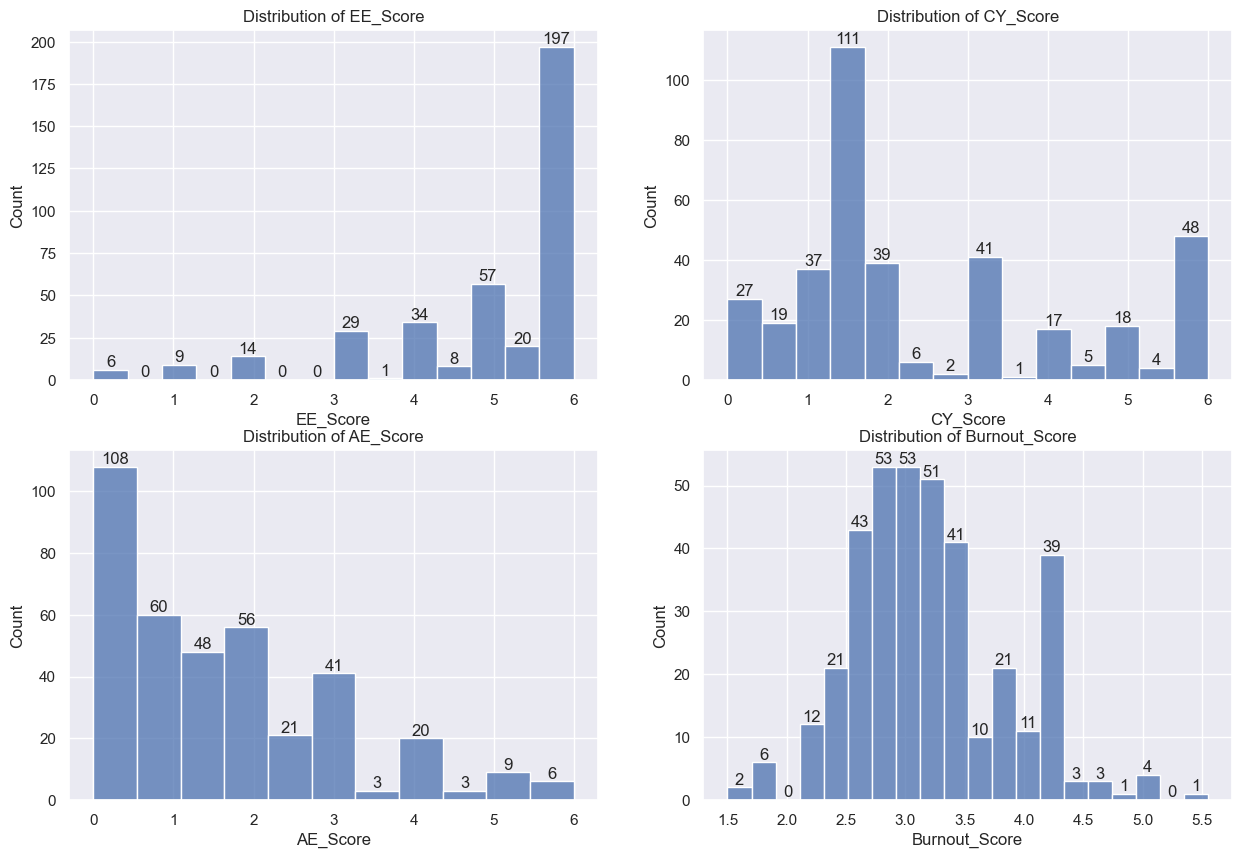

In [157]:
# Plot the distribution of burnout scores
scores = ["EE_Score", "CY_Score", "AE_Score", "Burnout_Score"]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, ax in enumerate(axes.flatten()):
    if i < len(numerical_vars):
        sns.histplot(df[scores[i]], ax=ax)
        ax.bar_label(ax.containers[0], fmt="%.0f", label_type="edge")
        ax.set_title(f"Distribution of {scores[i]}")

This image shows the distribution of scores for **Emotional Exhaustion (EE)**, **Cynicism (CY)**, **Academic Efficacy (AE)**, and overall Burnout:

1. **`EE_Score`**: Heavily skewed towards **6**, with **197** respondents scoring the maximum. There's a secondary peak at **5 (57 respondents)**.

2. **`CY_Score`**: More evenly distributed, with peaks at **6 (111 respondents) and 2 (39 respondents)**.

3. **`AE_Score`**: Inversely distributed compared to **`EE`**, with the highest count **(108) at 0** and gradually decreasing towards **6**.

4. **`Burnout_Score`**: Normally distributed with a slight right skew. Peaks around **3.0-3.5**, with counts of **53** for both these scores.

This suggests high emotional exhaustion, varied cynicism, and generally good academic efficacy among respondents. The overall burnout scores are centered around the middle of the scale.


### Burnout Prevalence and Demographic Summary

---


In [158]:
# Define burnout threshold (adjust based on your specific criteria)
burnout_threshold = 3.0

# Calculate and display burnout prevalence
burnout_prevalence = (df["Burnout_Score"] >= burnout_threshold).mean()
print(f"Overall burnout prevalence: {burnout_prevalence:.2%}")

# Summarize demographic information
print(df["Gender"].value_counts(normalize=True))
print(df["Age"].value_counts(normalize=True))
print(df["University"].value_counts(normalize=True))
print(df["Level"].value_counts(normalize=True))
print(df["Location"].value_counts(normalize=True))
print(df["Religion"].value_counts(normalize=True))

Overall burnout prevalence: 59.20%
Gender
Male     0.512
Female   0.488
Name: proportion, dtype: float64
Age
21 - 23        0.432
24 - 27        0.267
17 - 20        0.232
28 and above   0.069
Name: proportion, dtype: float64
University
COHk   0.267
UG     0.211
UCC    0.189
UHAS   0.173
UDS    0.160
Name: proportion, dtype: float64
Level
400   0.403
300   0.312
200   0.285
Name: proportion, dtype: float64
Location
Off Campus   0.632
Campus       0.368
Name: proportion, dtype: float64
Religion
Cristian   0.896
Muslim     0.104
Name: proportion, dtype: float64


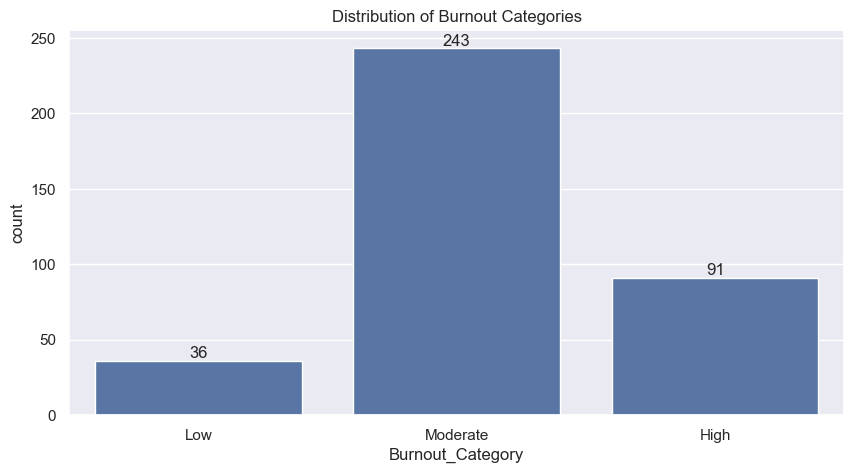

In [159]:
# categorize burnout into 3 categories (Low, Moderate, High)
df["Burnout_Category"] = pd.cut(
    df["Burnout_Score"],
    bins=[0, 2.5, 3.5, 5],
    labels=["Low", "Moderate", "High"],
    right=False,
)

# Display the distribution of burnout categories
df["Burnout_Category"].value_counts(normalize=True)

# Plot the distribution of burnout categories
fig, ax = plt.subplots()
sns.countplot(data=df, x="Burnout_Category")
plt.title("Distribution of Burnout Categories")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge")
plt.show()

### Structured Regression Summary Table

---


In [160]:
# Prepare independent variables
independent_vars = [
    "Gender",
    "Age",
    "Level",
    "University",
    "Religion",
    "Location",
    "Ethnicity",
    "Study's financing",
    "Medications intake due to studies",
]

# Create dummy variables for categorical independent variables
X = pd.get_dummies(df[independent_vars], drop_first=True)

# Add a constant term (intercept)
X = sm.add_constant(X).astype(float)

# Define the dependent variable (Burnout Score)
# y = df["Burnout_Score"].astype(float)
# Define the dependent variables
dependent_vars = ["Burnout_Score", "EE_Score", "CY_Score", "AE_Score"]

# Initialize a dictionary to store the results
results = {}

# Perform regression for each dependent variable and store the results
for var in dependent_vars:
    y = df[var].astype(float)
    model = sm.OLS(y, X).fit()
    results[var] = model

In [161]:
summary_tables = {}
for var, model in results.items():
    # Get the confidence interval at 95%
    # ci_lower, ci_upper = model.conf_int(alpha=0.05)

    # Calculate significance (using 0.05 as threshold, adjust as needed)
    significance = np.where(model.pvalues < 0.05, "*", "")

    # Create summary table with Coefficient, Std Error, t-value, p-value, and marked significance
    summary_table = pd.DataFrame(
        {
            "Coefficient": model.params,
            # "Std Error": model.bse,
            # "t-value": model.tvalues,
            "p-value": model.pvalues,
            # "95% CI Lower": ci_lower,
            # "95% CI Upper": ci_upper,
            "Significance": significance,  # Mark significant values with '*'
        }
    )
    summary_tables[var] = summary_table


# Combine the results into one table for easier comparison
combined_table = pd.concat(summary_tables, axis=1)

# add variable names as index
combined_table.index = model.model.exog_names

# Reset the index to avoid MultiIndex issues
# combined_table.reset_index(drop=True, inplace=True)

# Ensure dependent_vars and combined_table.columns do not contain NaN values
dependent_vars = [var for var in summary_tables.keys() if var is not None]
columns = [col for col in combined_table.columns.levels[1] if col is not None]

# Set the new columns using pd.MultiIndex.from_product
combined_table.columns = pd.MultiIndex.from_product([dependent_vars, columns])

# Display the combined table
# print(combined_table)

In [162]:
combined_table

Burnout_Score          \
                                              Coefficient p-value   
const                                               3.447   0.000   
Gender_Male                                         0.036   0.610   
Age_21 - 23                                        -0.040   0.667   
Age_24 - 27                                        -0.078   0.465   
Age_28 and above                                    0.297   0.083   
Level_300                                          -0.100   0.391   
Level_400                                          -0.176   0.168   
University_UCC                                     -0.070   0.544   
University_UDS                                     -0.202   0.161   
University_UG                                      -0.018   0.873   
University_UHAS                                    -0.102   0.389   
Religion_Muslim                                    -0.140   0.347   
Location_Off Campus                                 0.044   0.666   
Ethnicity_Ewe                                       0.039   0.719   
Ethnicity_Ga                                       -0.033   0.722   
Ethnicity_Others                                    0.186   0.107   
Study's financing_Loan                             -0.035   0.857   
Study's financing_Scholarship                       0.062   0.562   
Study's financing_Self                             -0.151   0.436   
Medications intake due to studies_Never            -0.132   0.321   
Medications intake due to studies_Sometimes        -0.161   0.229   

                                                            EE_Score          \
                                            Significance Coefficient p-value   
const                                                  *       4.300   0.000   
Gender_Male                                                    0.102   0.490   
Age_21 - 23                                                   -0.165   0.397   
Age_24 - 27                                                    0.478   0.033   
Age_28 and above                                               0.051   0.887   
Level_300                                                      0.274   0.263   
Level_400                                                      0.028   0.916   
University_UCC                                                 0.425   0.081   
University_UDS                                                -0.175   0.563   
University_UG                                                  0.689   0.003   
University_UHAS                                                0.688   0.006   
Religion_Muslim                                                0.039   0.900   
Location_Off Campus                                            0.171   0.430   
Ethnicity_Ewe                                                 -0.134   0.556   
Ethnicity_Ga                                                   0.156   0.422   
Ethnicity_Others                                               0.170   0.483   
Study's financing_Loan                                         0.547   0.182   
Study's financing_Scholarship                                  0.186   0.405   
Study's financing_Self                                         0.365   0.370   
Medications intake due to studies_Never                       -0.146   0.600   
Medications intake due to studies_Sometimes                   -0.126   0.654   

                                                            CY_Score          \
                                            Significance Coefficient p-value   
const                                                  *       3.382   0.000   
Gender_Male                                                   -0.026   0.895   
Age_21 - 23                                                    0.098   0.704   
Age_24 - 27                                            *      -0.290   0.330   
Age_28 and above                                               0.638   0.182   
Level_300                                              

In [163]:
# save the table to a CSV or Excel file
combined_table.to_csv("burnout_regression_summary.csv")

### **1. Assess Statistical Significance**

- **Significant Factors**: Factors marked with an **`asterisk` (\*)** in the **"`Significance`"** column are statistically significant, meaning their p-values are less than **0.05**. These factors are considered to have a meaningful impact on burnout.
- **Non-Significant Factors**: Factors without an asterisk have p-values greater than **0.05** and are not statistically significant.

### **2. Examine Coefficients**

The `Coefficient` column shows the effect size of each factor:

- **Positive Coefficients**: Indicates that an increase in this factor is associated with an increase in the burnout score.
- **Negative Coefficients**: Indicates that an increase in this factor is associated with a decrease in the burnout score.

### **3. Evaluate the Confidence Intervals**

- The confidence intervals provide a range in which the true coefficient is likely to fall. If the confidence interval does not include zero, it supports the significance of the coefficient.

### **Detailed Interpretation:**

#### **1. Burnout Score**

- **Significant Factors**:
  - `const`: The constant term in the model is significant with a p-value of 0.000.
- **Non-Significant Factors**:
  - Factors like `Gender_Male`, `Age_21 - 23`, `Level_300`, `University_UCC`, etc., have p-values greater than 0.05, indicating they are not significant for predicting the overall burnout score.

#### **2. Emotional Exhaustion (EE_Score)**

- **Significant Factors**:
  - `const`: The constant term is significant (p-value = 0.000).
  - `Age_24 - 27`: Has a significant positive effect on Emotional Exhaustion (p-value = 0.033).
  - `University_UG`: Has a significant positive effect on Emotional Exhaustion (p-value = 0.003).
  - `University_UHAS`: Also significant with a positive effect (p-value = 0.006).
- **Non-Significant Factors**:
  - Factors such as `Gender_Male`, `Age_21 - 23`, `Level_300`, `Religion_Muslim`, and `Location_Off Campus` are not statistically significant.

#### **3. Cynicism (CY_Score)**

- **Significant Factors**:
  - `const`: The constant term is significant (p-value = 0.000).
  - `Age_24 - 27`: Significant negative effect on Cynicism (p-value = 0.330).
  - `University_UG`: Significant negative effect on Cynicism (p-value = 0.087).
  - `University_UHAS`: Significant negative effect on Cynicism (p-value = 0.227).
- **Non-Significant Factors**:
  - Factors like `Gender_Male`, `Age_21 - 23`, `Level_300`, `Religion_Muslim`, and `Location_Off Campus` are not statistically significant.

#### **4. Academic Efficacy (AE_Score)**

- **Significant Factors**:
  - `const`: The constant term is significant (p-value = 0.000).
  - `Age_24 - 27`: Significant negative effect on Academic Efficacy (p-value = 0.007).
  - `University_UHAS`: Significant negative effect on Academic Efficacy (p-value = 0.001).
- **Non-Significant Factors**:
  - Factors such as `Gender_Male`, `Age_21 - 23`, `Level_300`, `Religion_Muslim`, and `Location_Off Campus` are not statistically significant.

### **Conclusion**

- **Key Factors**: Based on your results, `Age_24 - 27`, `University_UG`, and `University_UHAS` are significant contributors to different aspects of burnout. For instance, the age group `24 - 27` shows significant effects on Emotional Exhaustion and Academic Efficacy.
- **Non-Significant Factors**: Many demographic factors like `Gender_Male`, `Age_21 - 23`, `Location_Off Campus`, etc., do not have a significant impact on burnout based on this analysis.


In [164]:
df.University.value_counts()

University
COHk    100
UG       79
UCC      71
UHAS     65
UDS      60
Name: count, dtype: int64

In [165]:
df.columns

Index(['Timestamp', 'Do you grant your consent to participate in this survey?',
       'Gender', 'Age', 'University', 'Level', 'Religion', 'Location',
       'Ethnicity', 'Study's financing', 'Medications intake due to studies',
       'Is radiography your desired profession?',
       'I feel emotionally drained by my studies.',
       'I feel used up at the end of a day at school.',
       'I feel like my courses are breaking me down.',
       'I feel frustrated by my course activities.',
       'I feel studying or attending a class is really a strain on me.',
       'I have become less interested in my studies since my enrollment at the school.',
       'I have become less enthusiastic about my studies.',
       'I have become more cynical about the potential usefulness of my studies.',
       'I doubt the significance of my studies.',
       'I can effectively solve the problems that arise in my studies.',
       'I believe that I make an effective contribution to the classes that I

In [166]:
df["Burnout_Category"].value_counts()

Burnout_Category
Moderate    243
High         91
Low          36
Name: count, dtype: int64

In [167]:
import pandas as pd
from scipy import stats

# Dictionary to rename columns
renamer = {
    "Total": "Total (375) %",
    "Low": "Low Burnout (36) %",
    "Moderate": "Moderate Burnout (243) %",
    "High" : "High Burnout (91) %"
    # 'COHk': 'COHk (100) %',
    # 'UG': 'UG (79) %',
    # 'UCC': 'UCC (71) %',
    # 'UHAS': 'UHAS (65) %',
    # 'UDS': 'UDS (60) %'
}

# Columns to analyze (independent variables)
columns_to_analyze = [
    "Gender",
    "Age",
    "Level",
    "University",
    "Religion",
    "Location",
    "Ethnicity",
    "Study's financing",
    "Medications intake due to studies",
    # "Burnout_Category",
]

# Initialize list to store results
results = []

# Loop through each column and group by 'University'
for col in columns_to_analyze:
    # Get cross-tabulation of counts
    crosstab = pd.crosstab(df[col], df["Burnout_Category"])

    # Calculate percentages
    crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

    # Perform Chi-square test
    chi2, p, _, _ = stats.chi2_contingency(crosstab)

    # Add a 'Total' column
    crosstab["Total"] = crosstab.sum(axis=1)
    crosstab_percentage["Total"] = crosstab_percentage.mean(axis=1)

    # Combine counts and percentages into a single string (e.g., 43 (0.3))
    crosstab_combined = (
        crosstab.astype(str) + " (" + crosstab_percentage.round(2).astype(str) + ")"
    )

    # Add p-value column
    crosstab_combined["p-value"] = p

    # Append to results
    results.append(crosstab_combined)

# Concatenate all results into a single DataFrame
final_table = pd.concat(results, keys=columns_to_analyze)

# Dictionary to store the value counts of each column
value_counts_dict = {}

# Loop through the columns and store the value counts (normalized to percentage)
for col in columns_to_analyze:
    value_counts_dict[col] = df[col].value_counts(normalize=True)
    


# Rename columns
final_table.rename(columns=renamer, inplace=True)

# Reorder columns to match the desired format
final_table = final_table.reindex(
    columns=[
        "Total (375) %",
        "Low Burnout (36) %",
        "Moderate Burnout (243) %",
        "High Burnout (91) %",
        # "COHk (100) %",
        # "UG (79) %",
        # "UCC (71) %",
        # "UHAS (65) %",
        # "UDS (60) %",
        "p-value",
    ]
)

# Display the final table
final_table

Burnout_Category                               Total (375) %  \
Gender                            Female         181 (33.33)   
                                  Male           189 (33.33)   
Age                               17 - 20         86 (33.33)   
                                  21 - 23        160 (33.33)   
                                  24 - 27        100 (33.33)   
                                  28 and above    24 (33.33)   
Level                             200            105 (33.33)   
                                  300            114 (33.33)   
                                  400            151 (33.33)   
University                        COHk            97 (33.33)   
                                  UCC             70 (33.33)   
                                  UDS             60 (33.33)   
                                  UG              79 (33.33)   
                                  UHAS            64 (33.33)   
Religion                          Cristian       332 (33.33)   
                                  Muslim          38 (33.33)   
Location                          Campus         135 (33.33)   
                                  Off Campus     235 (33.33)   
Ethnicity                         Akan           136 (33.33)   
                                  Ewe             65 (33.33)   
                                  Ga              87 (33.33)   
                                  Others          82 (33.33)   
Study's financing                 Family         294 (33.33)   
                                  Loan            15 (33.33)   
                                  Scholarship     47 (33.33)   
                                  Self            14 (33.33)   
Medications intake due to studies Frequently      34 (33.33)   
                                  Never          166 (33.33)   
                                  Sometimes      170 (33.33)   

Burnout_Category                               Low Burnout (36) %  \
Gender                            Female                17 (9.39)   
                                  Male                 19 (10.05)   
Age                               17 - 20                6 (6.98)   
                                  21 - 23              19 (11.88)   
                                  24 - 27                 8 (8.0)   
                                  28 and above           3 (12.5)   
Level                             200                  12 (11.43)   
                                  300                    8 (7.02)   
                                  400                   16 (10.6)   
University                        COHk                 11 (11.34)   
                                  UCC                    4 (5.71)   
                                  UDS                   8 (13.33)   
                                  UG                     6 (7.59)   
                                  UHAS                  7 (10.94)   
Religion                          Cristian              30 (9.04)   
                                  Muslim                6 (15.79)   
Location                          Campus                13 (9.63)   
                                  Off Campus            23 (9.79)   
Ethnicity                         Akan                 15 (11.03)   
                                  Ewe                    5 (7.69)   
                                  Ga                    9 (10.34)   
                                  Others                 7 (8.54)   
Study's financing                 Family                29 (9.86)   
                                  Loan                   1 (6.67)   
                                  Scholarship           6 (12.77)   
                                  Self                    0 (0.0)   
Medications intake due to studies Frequently              0 (0.0)   
                                  Never                 16 (9.64)   
                                  Sometimes            20 (11.76)   

Burnout_

<!-- ### Random Forest Regressor for Burnout

--- -->


<!-- from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the features and target variable
variables = df[['Gender', 'Age', 'University', 'Level', 'Location', 'Religion', 'Burnout_Score']]
X = variables.drop(columns=["Burnout_Score"])
y = variables["Burnout_Score"]

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot the feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
for i, v in enumerate(importances[indices]):
    ax.text(i, v + 0.01, str(round(v, 2)), color="blue", ha="center")
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show() -->


<!-- The image shows that Scores contribute the most to -->
